Use and experience methods from previous lessons with given data. Try to search for other pandas methods to analyze the data such as groupby() and query(). Write functions for repetitive tasks.

TODOs:

See the spread of pandemic in different countries.
Plot graphs for Reproduction Rate for different countries side by side or in the same graph.
Check correlation between deaths and recoveries.
Compare recoveries between countries.
Are there any outliers (anomalies)?

In [1]:

infected_dataset_url = r"C:\ornekler\kizKarDes_data_sience\data\covid\time_series_covid19_confirmed_global.csv"
recovered_dataset_url = r"C:\ornekler\kizKarDes_data_sience\data\covid\time_series_covid19_deaths_global.csv"
deaths_dataset_url =  r"C:\ornekler\kizKarDes_data_sience\data\covid\time_series_covid19_recovered_global.csv"


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#  okuma
df_confirmed = pd.read_csv(infected_dataset_url)
df_recovered = pd.read_csv(recovered_dataset_url)
df_deaths    = pd.read_csv(deaths_dataset_url)

In [4]:
df_confirmed.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142


In [5]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 150 entries, Province/State to 6/15/20
dtypes: float64(2), int64(146), object(2)
memory usage: 311.8+ KB


In [6]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,327,357,369,384,405,426,446,451,471,478
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,34,34,34,34,34,35,36,36,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,698,707,715,724,732,741,751,760,767,777
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,4,4,4,4,5,5,6,6,6


In [7]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,925,938,945,960,980,1001,1034,1039,1044,1055
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,741,744,751,757,759,780,781,781,781,789
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,38,38,40,41,42,61,61,64


In [8]:
def tidy_covid(df_wide: pd.DataFrame, value_name: str) -> pd.DataFrame:
    id_cols = ["Province/State", "Country/Region", "Lat", "Long"]
    df_long = (
        df_wide
        .melt(id_vars=id_cols, var_name="Date", value_name=value_name)
        .assign(Date=lambda x: pd.to_datetime(x["Date"]))
    )
    return df_long


In [10]:
tidy_confirmed = tidy_covid(df_confirmed, "Confirmed")
tidy_deaths    = tidy_covid(df_deaths,    "Deaths")
tidy_recovered = tidy_covid(df_recovered, "Recovered")


C:\Users\dellg\AppData\Local\Temp\ipykernel_24228\339454564.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .assign(Date=lambda x: pd.to_datetime(x["Date"]))
C:\Users\dellg\AppData\Local\Temp\ipykernel_24228\339454564.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .assign(Date=lambda x: pd.to_datetime(x["Date"]))
C:\Users\dellg\AppData\Local\Temp\ipykernel_24228\339454564.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  .assign(Date=lambda x: pd.to_datetime(x["Date"]))


In [11]:
tidy_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0


In [27]:
tidy_deaths.head(10)

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0


See the spread of pandemic in different countries

In [13]:
key_cols = ["Province/State", "Country/Region", "Lat", "Long", "Date"]

full = (
    tidy_confirmed
    .merge(tidy_deaths,    on=key_cols, how="left")
    .merge(tidy_recovered, on=key_cols, how="left")
    .fillna(0)
)


In [14]:
# 1) Kaç farklı ülke var?
n_countries = full["Country/Region"].nunique()
print("Benzersiz ülke sayısı:", n_countries)

Benzersiz ülke sayısı: 188


In [15]:
# 2) Province/State sütununda kaç farklı değer var? 
n_states = full["Province/State"].nunique(dropna=True)
print("Benzersiz eyalet/il (Province/State) sayısı:", n_states)

Benzersiz eyalet/il (Province/State) sayısı: 82


In [45]:
%pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.8 MB 882.6 kB/s eta 0:00:17
   -- ------------------------------------- 0.8/14.8 MB 1.1 MB/s eta 0:00:13
   -- ------------------------------------- 1.0/14.8 MB 1.1 MB/s eta 0:00:13
   ---- ----------------------------------- 1.6/14.8 MB 1.3 MB/s eta 0:00:11
   ---- ----------------------------------- 1.8/14.8 MB 1.3 MB/s eta 0:00:10
   ----- ---------------------------------- 2.1/14.8 MB 1.4 MB/s eta 0:00:10
   ------ --------------------------------- 2.4/14.8 MB 1.4 MB/s eta 0:00:09
   ------- -------------------------------- 2.9/14.8 MB 1.5 MB/s eta 0:00:09
   -------- ------------------------------- 3.1/14.8 MB 1.5 MB/s eta 0:00:08
   --------- ------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# 4) Ülke + tarih bazında özetle
country_daily = (
    full.groupby(["Country/Region", "Date"], as_index=False)
        [["Confirmed", "Deaths", "Recovered"]]
        .sum()
)

In [20]:
import plotly.express as px

latest = country_daily[country_daily["Date"] == country_daily["Date"].max()]

fig = px.choropleth(
        latest,
        locations="Country/Region",
        locationmode="country names",
        color="Confirmed",
        hover_name="Country/Region",
        color_continuous_scale="Reds",
        title="Son Tarihte Kümülatif Vaka Sayısı")
fig.show()



In [22]:
# 1) Günlük yeni vakalar
country_daily["NewCases"] = (
    country_daily
        .sort_values(["Country/Region", "Date"])          # emin olmak için sıralayın
        .groupby("Country/Region")["Confirmed"]
        .diff()
        .clip(lower=0)                                    # negatifleri 0’a bastır
)

# 2) 7 günlük toplam
country_daily["WeeklySum"] = (
    country_daily
        .groupby("Country/Region")["NewCases"]
        .transform(lambda s: s.rolling(7, min_periods=1).sum())
)

# 3) R tahmini  (hafta0 / hafta‑1)
country_daily["R_est"] = (
    country_daily
        .groupby("Country/Region")["WeeklySum"]
        .transform(lambda s: s / s.shift(7))
)


C:\Users\dellg\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight

C:\Users\dellg\AppData\Local\Temp\ipykernel_24228\753022454.py:16: UserWarning:

The figure layout has changed to tight



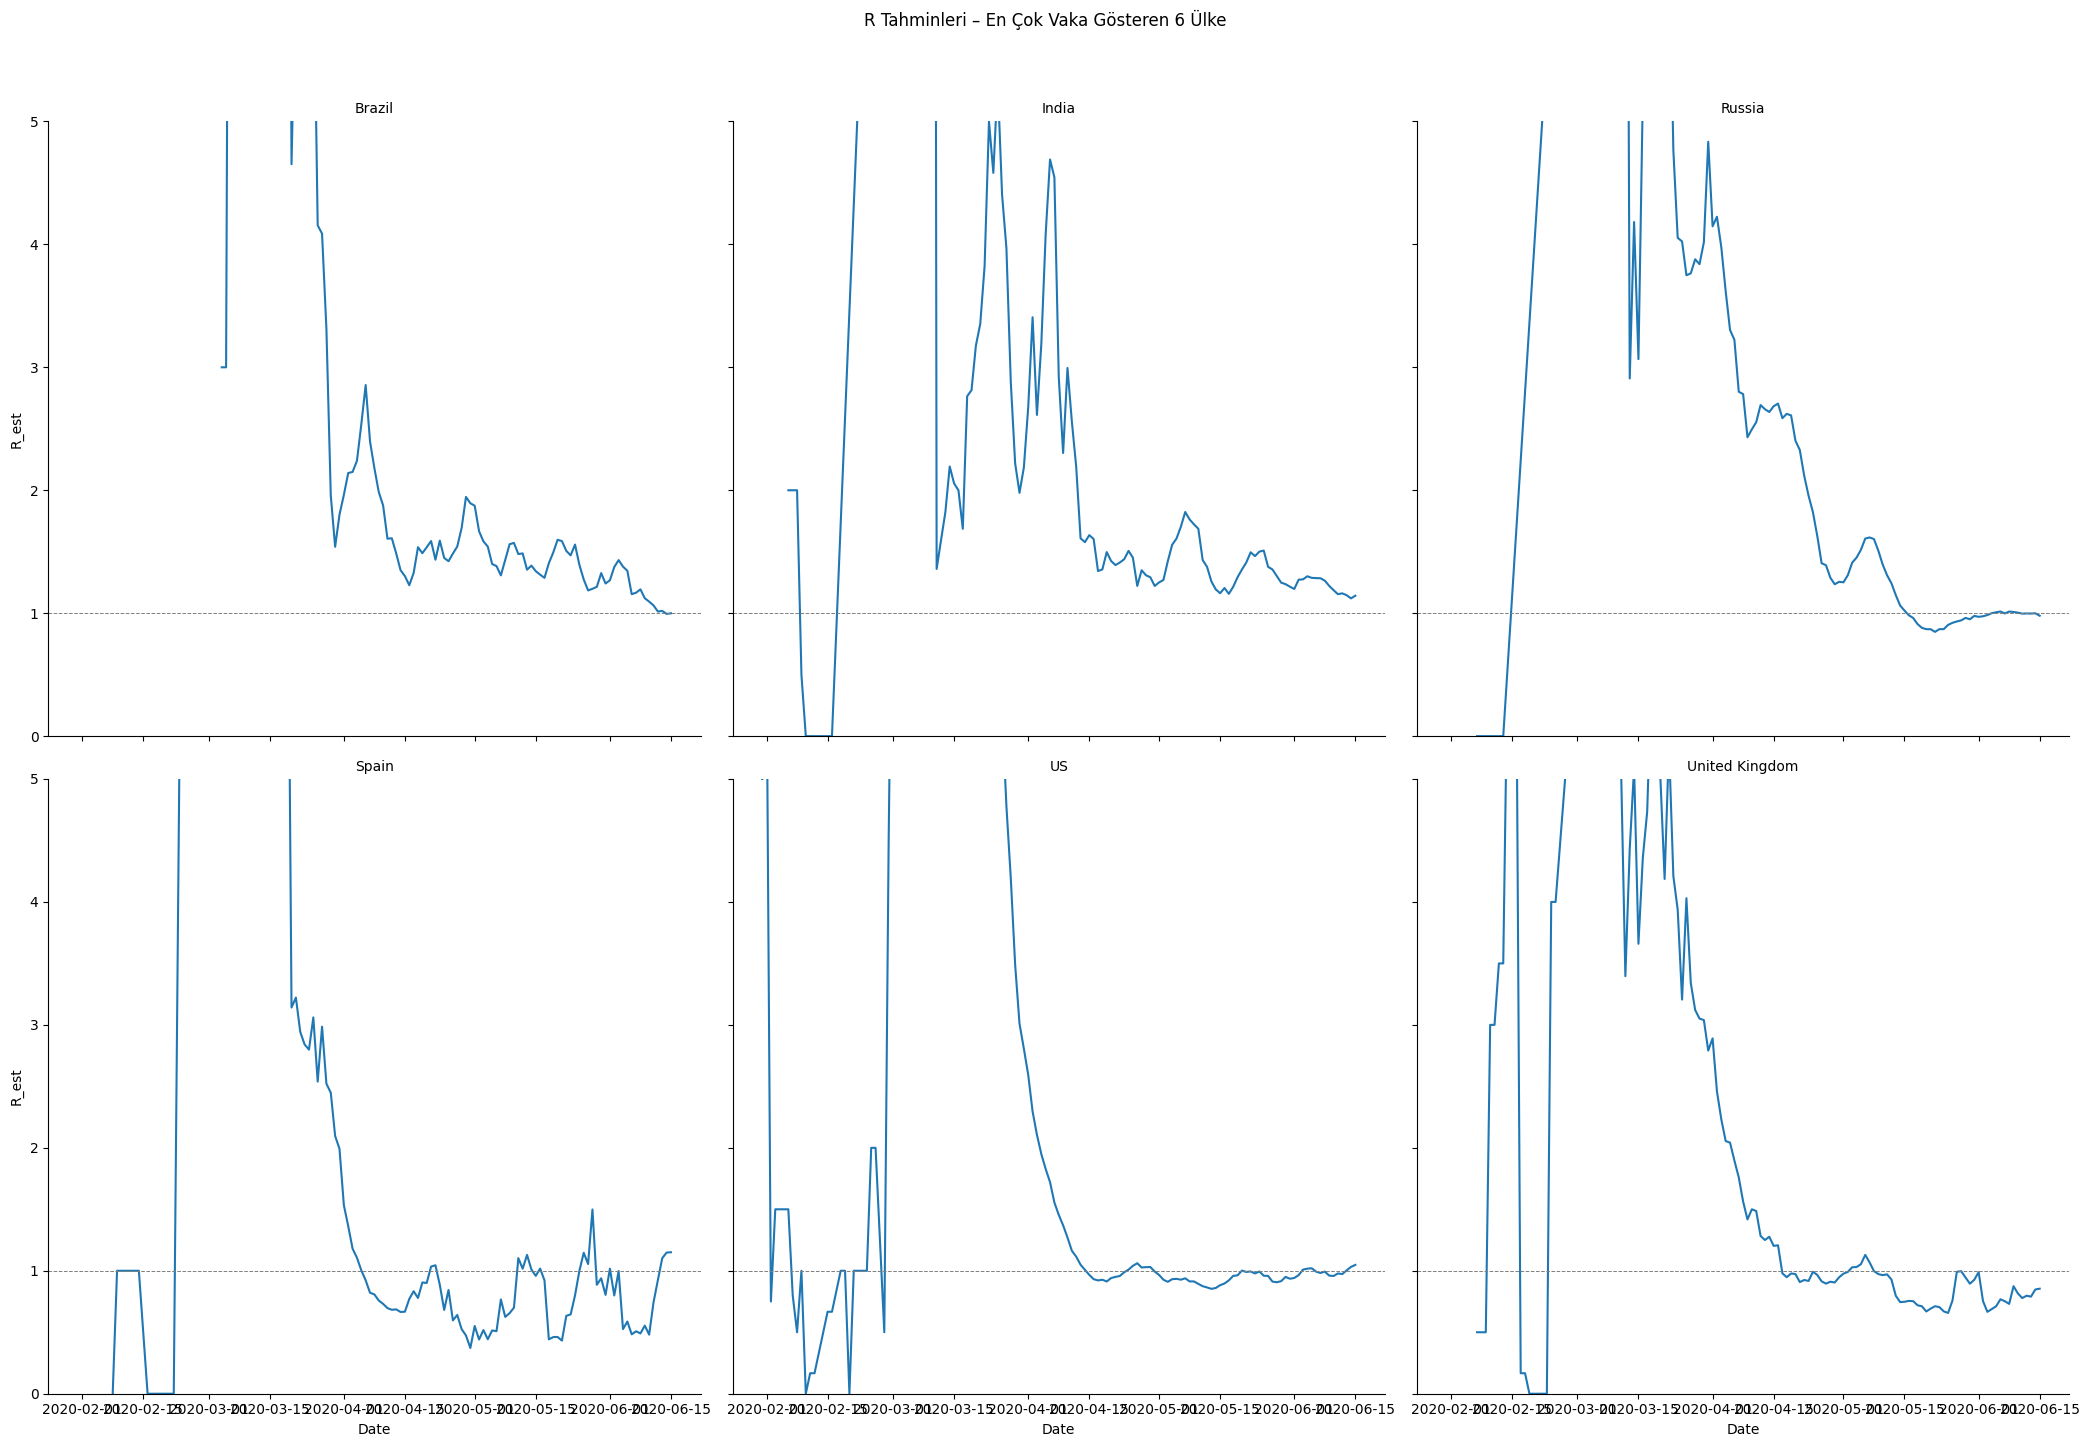

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt   # Seaborn genelde Matplotlib ile birlikte çalışır

top6 = (
    country_daily[country_daily["Date"] == country_daily["Date"].max()]
    .nlargest(6, "Confirmed")["Country/Region"]
)
g = sns.FacetGrid(country_daily.query("`Country/Region` in @top6"),
                  col="Country/Region", col_wrap=3, height=7.0, sharey=True)
g.map_dataframe(sns.lineplot, x="Date", y="R_est")
g.set_titles(col_template="{col_name}")
for ax in g.axes.ravel():
    ax.axhline(1, ls="--", lw=0.7, color="grey")
    ax.set_ylim(0,5)
g.fig.suptitle("R Tahminleri – En Çok Vaka Gösteren 6 Ülke", y=1.03)
plt.tight_layout()
plt.show()

In [38]:
# tidy_recovered mutlaka 'Date' sütunu datetime, 'Country/Region' ve 'Recovered' sütunlarını içeriyor olmalı
latest_date = tidy_recovered["Date"].max()

latest_recov = (
    tidy_recovered[tidy_recovered["Date"] == latest_date]
    .groupby("Country/Region", as_index=False)["Recovered"]
    .sum()
    .sort_values("Recovered", ascending=False)
)


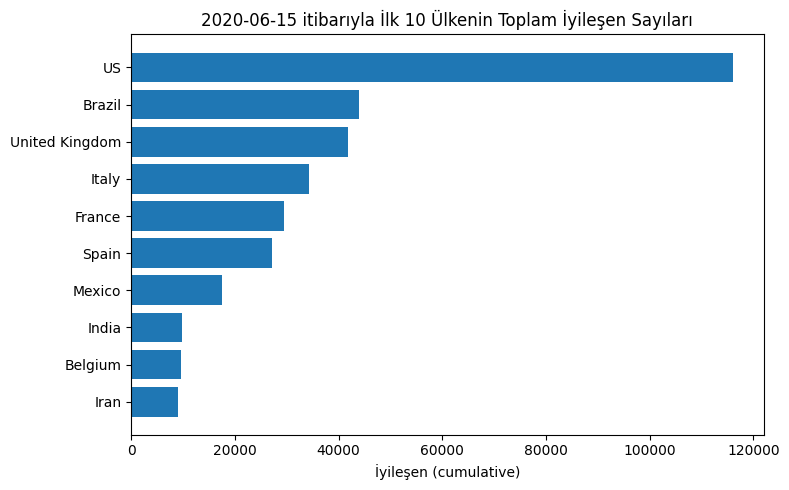

In [41]:
topN = 10      # ilk 10 ülke
plot_df = latest_recov.head(topN).iloc[::-1]   # ters çevirirsek yatay bar'da en büyük üstte

plt.figure(figsize=(8, 5))
plt.barh(plot_df["Country/Region"], plot_df["Recovered"])
plt.title(f"{latest_date:%Y‑%m‑%d} itibarıyla İlk {topN} Ülkenin Toplam İyileşen Sayıları")
plt.xlabel("İyileşen (cumulative)")
plt.tight_layout()
plt.show()


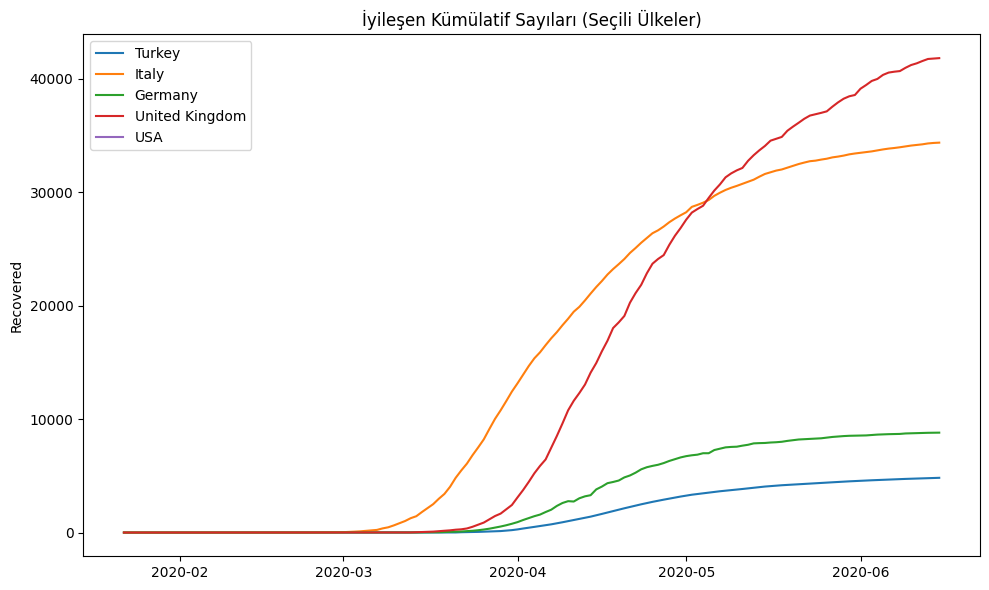

In [42]:
sel = ["Turkey", "Italy", "Germany", "United Kingdom", "USA"]

cmp_df = (
    tidy_recovered[tidy_recovered["Country/Region"].isin(sel)]
    .groupby(["Country/Region", "Date"], as_index=False)["Recovered"].sum()
)

plt.figure(figsize=(10,6))
for c in sel:
    sub = cmp_df[cmp_df["Country/Region"] == c]
    plt.plot(sub["Date"], sub["Recovered"], label=c)
plt.title("İyileşen Kümülatif Sayıları (Seçili Ülkeler)")
plt.ylabel("Recovered")
plt.legend()
plt.tight_layout()
plt.show()
